In [1]:
# !pip install statsmodels

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import warnings
import os

In [2]:
pd.options.display.max_columns = None

In [3]:
pd.options.display.max_rows = 30

## Import data files

In [4]:
pwd

'D:\\data science\\CampusX\\credit_worthiness_'

In [5]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is 6A78-1BA5

 Directory of D:\data science\CampusX\credit_worthiness_

02-09-2024  11:25    <DIR>          .
18-08-2024  19:01    <DIR>          ..
18-08-2024  19:03    <DIR>          .ipynb_checkpoints
02-09-2024  11:25           138,915 _01_CRM_campusX.ipynb
28-07-2024  11:05         5,382,959 case_study1.xlsx
28-07-2024  11:05        13,268,022 case_study2.xlsx
28-07-2024  11:05            12,919 Features_Target_Description.xlsx
18-08-2024  19:09    <DIR>          Material_Session 04
28-07-2024  11:06             3,181 Python Code.txt
18-08-2024  19:01                20 README.md
14-08-2024  08:00    <DIR>          session 3
               6 File(s)     18,806,016 bytes
               5 Dir(s)  62,264,627,200 bytes free


In [6]:
a1 = pd.read_excel('case_study1.xlsx') # company data
a2 = pd.read_excel('case_study2.xlsx') # bureau data

In [7]:
a1.shape, a2.shape

((51336, 26), (51336, 62))

In [8]:
a1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131,32


In [9]:
a2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,-99999,-99999,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6,0,0,0,6,0,0,566,0,0,0,Married,12TH,48,M,51000,114,0.200,0.0,0.798,-99999.0,0,0.798,1,0.0,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,209,1,0,0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,25,25,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,0,587,0,0,0,Married,SSC,40,M,18,191,1.000,0.5,0.585,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,Married,SSC,34,M,10000,246,1.000,1.0,0.990,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3951,0,0,0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [10]:
a1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [11]:
a2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [12]:
df1 = a1.copy()
df2 = a2.copy()

## EDA

### Checking for null values

In [13]:
df1.isnull().sum()

PROSPECTID              0
Total_TL                0
Tot_Closed_TL           0
Tot_Active_TL           0
Total_TL_opened_L6M     0
Tot_TL_closed_L6M       0
pct_tl_open_L6M         0
pct_tl_closed_L6M       0
pct_active_tl           0
pct_closed_tl           0
Total_TL_opened_L12M    0
Tot_TL_closed_L12M      0
pct_tl_open_L12M        0
pct_tl_closed_L12M      0
Tot_Missed_Pmnt         0
Auto_TL                 0
CC_TL                   0
Consumer_TL             0
Gold_TL                 0
Home_TL                 0
PL_TL                   0
Secured_TL              0
Unsecured_TL            0
Other_TL                0
Age_Oldest_TL           0
Age_Newest_TL           0
dtype: int64

In [14]:
df2.isnull().sum()

PROSPECTID                      0
time_since_recent_payment       0
time_since_first_deliquency     0
time_since_recent_deliquency    0
num_times_delinquent            0
                               ..
GL_Flag                         0
last_prod_enq2                  0
first_prod_enq2                 0
Credit_Score                    0
Approved_Flag                   0
Length: 62, dtype: int64

In [15]:
df1.duplicated().sum()

0

In [16]:
df2.duplicated().sum()

0

In [17]:
len(df1['PROSPECTID'].unique())

51336

### checking for percent columns- min/ max values, any outlier or wrong data availability 

* filtered_columns = df1.filter(regex=f'(?i){"tl"}') # this is case insensitive
* filtered_columns

In [18]:
pct_columns = df1.filter(like='pct')

In [19]:
pct_columns

,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,pct_tl_open_L12M,pct_tl_closed_L12M
0,0.000,0.00,0.200,0.800,0.000,0.00
1,0.000,0.00,1.000,0.000,1.000,0.00
2,0.125,0.00,1.000,0.000,0.250,0.00
3,1.000,0.00,1.000,0.000,1.000,0.00
4,0.000,0.00,0.333,0.667,0.000,0.00
...,...,...,...,...,...,...
51331,0.333,0.00,1.000,0.000,0.333,0.00
51332,0.000,0.25,0.500,0.500,0.500,0.25
51333,0.500,0.50,0.500,0.500,1.000,0.50
51334,0.000,0.00,0.500,0.500,0.500,0.50


In [20]:
pct_columns['pct_tl_open_L6M'].describe()

count    51336.000000
mean         0.184574
std          0.297414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.308000
max          1.000000
Name: pct_tl_open_L6M, dtype: float64

In [21]:
pct_columns['pct_tl_closed_L6M'].describe()

count    51336.000000
mean         0.089095
std          0.205635
min          0.000000
25%          0.000000
50%          0.000000
75%          0.053000
max          1.000000
Name: pct_tl_closed_L6M, dtype: float64

In [22]:
pct_columns['pct_active_tl'].describe()

count    51336.000000
mean         0.577542
std          0.379867
min          0.000000
25%          0.250000
50%          0.556000
75%          1.000000
max          1.000000
Name: pct_active_tl, dtype: float64

In [23]:
pct_columns['pct_closed_tl'].describe()

count    51336.000000
mean         0.422458
std          0.379867
min          0.000000
25%          0.000000
50%          0.444000
75%          0.750000
max          1.000000
Name: pct_closed_tl, dtype: float64

In [24]:
pct_columns['pct_tl_open_L12M'].describe()

count    51336.000000
mean         0.395184
std          0.391930
min          0.000000
25%          0.000000
50%          0.333000
75%          0.750000
max          1.000000
Name: pct_tl_open_L12M, dtype: float64

In [25]:
pct_columns['pct_tl_closed_L12M'].describe()

count    51336.000000
mean         0.149989
std          0.257267
min          0.000000
25%          0.000000
50%          0.000000
75%          0.250000
max          1.000000
Name: pct_tl_closed_L12M, dtype: float64

### identifying null value 
* often represented as -99999

In [26]:
# identify all columns which has -99999 as a value
# and find percent of -99999 in any column wrt total column values

In [27]:
for i in df1.columns:
    if df1.loc[df1[i] == -99999].shape[0] > 1:
        print("Column: "+str(i))

Column: Age_Oldest_TL
Column: Age_Newest_TL


In [28]:
df1[df1['Age_Oldest_TL'] == -99999].shape[0]

40

In [29]:
df1[df1['Age_Newest_TL'] == -99999].shape[0]

40

there are only 40 rows with null value in 2 columns hence we can drop these rows

In [30]:
df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]

### checking NULL values in df2

In [31]:
df2.shape

(51336, 62)

In [32]:
for i in df2.columns:
    if df2.loc[df2[i] == -99999].shape[0] > 5000:
        print("Column: "+str(i))

Column: time_since_first_deliquency
Column: time_since_recent_deliquency
Column: max_delinquency_level
Column: max_deliq_6mts
Column: max_deliq_12mts
Column: tot_enq
Column: CC_enq
Column: CC_enq_L6m
Column: CC_enq_L12m
Column: PL_enq
Column: PL_enq_L6m
Column: PL_enq_L12m
Column: time_since_recent_enq
Column: enq_L12m
Column: enq_L6m
Column: enq_L3m
Column: CC_utilization
Column: PL_utilization
Column: max_unsec_exposure_inPct


In [33]:
for i in df2.columns:
    if df2.loc[df2[i] == -99999].shape[0] > 10000:
        print("Column: "+str(i)+", null %: "+str((df2[df2[i]==-99999].shape[0]/ df2.shape[0])*100))

Column: time_since_first_deliquency, null %: 70.02688172043011
Column: time_since_recent_deliquency, null %: 70.02688172043011
Column: max_delinquency_level, null %: 70.02688172043011
Column: max_deliq_6mts, null %: 25.109085242325076
Column: max_deliq_12mts, null %: 21.100202586878602
Column: CC_utilization, null %: 92.79258220352189
Column: PL_utilization, null %: 86.55719183419043
Column: max_unsec_exposure_inPct, null %: 45.14960261804581


we will drop 'CC_utilization', 'PL_utilization', 'max_unsec_exposure_inPct'

In [34]:
df2.drop(['CC_utilization', 'PL_utilization', 'max_unsec_exposure_inPct'], axis=1, inplace=True)

In [35]:
df2.shape

(51336, 59)

In [36]:
df2['max_deliq_6mts'].value_counts()

 0        33664
-99999    12890
 28         324
 3          323
 26         298
          ...  
 496          1
 266          1
 142          1
 304          1
 181          1
Name: max_deliq_6mts, Length: 206, dtype: int64

In [37]:
df2['max_deliq_12mts'].value_counts()

 0        32076
-99999    10832
 28         564
 26         503
 27         438
          ...  
 204          1
 387          1
 391          1
 171          1
 95           1
Name: max_deliq_12mts, Length: 294, dtype: int64

In [37]:
df2['time_since_first_deliquency'].value_counts()

-99999    35949
 35        1855
 34         596
 33         563
 7          488
          ...  
 20         293
 23         267
 2          240
 1           81
 0           28
Name: time_since_first_deliquency, Length: 37, dtype: int64

In [38]:
df2.loc[df2['time_since_first_deliquency'] == -99999, 'time_since_first_deliquency'] = np.nan

In [39]:
df2['time_since_first_deliquency'].describe()

count    15387.000000
mean        20.318646
std         10.831259
min          0.000000
25%         10.000000
50%         21.000000
75%         31.000000
max         35.000000
Name: time_since_first_deliquency, dtype: float64

<AxesSubplot:>

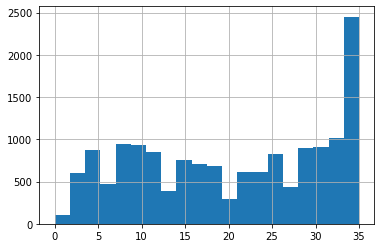

In [49]:
df2['time_since_first_deliquency'].hist(bins=20)

In [40]:
df2.loc[df2['time_since_recent_deliquency'] == -99999, 'time_since_recent_deliquency'] = np.nan

In [41]:
df2['time_since_recent_deliquency'].describe()

count    15387.000000
mean        12.696757
std          9.499626
min          0.000000
25%          4.000000
50%         10.000000
75%         20.000000
max         35.000000
Name: time_since_recent_deliquency, dtype: float64

<AxesSubplot:>

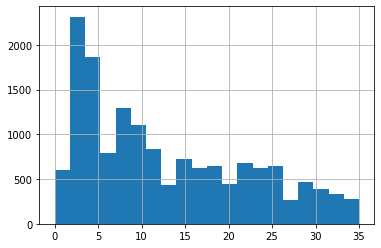

In [50]:
df2['time_since_recent_deliquency'].hist(bins=20)

In [42]:
df2.loc[df2['max_delinquency_level'] == -99999, 'max_delinquency_level'] = np.nan

In [43]:
df2['max_delinquency_level'].describe()

count    15387.000000
mean        74.047573
std        121.318443
min          1.000000
25%         24.000000
50%         33.000000
75%         83.000000
max        900.000000
Name: max_delinquency_level, dtype: float64

<AxesSubplot:>

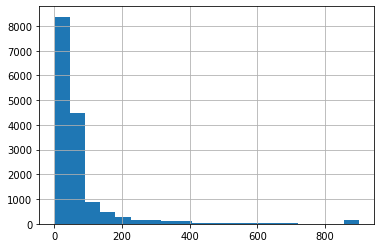

In [51]:
df2['max_delinquency_level'].hist(bins=20)

In [44]:
df2.loc[df2['max_deliq_6mts'] == -99999, 'max_deliq_6mts'] = np.nan

In [45]:
df2['max_deliq_6mts'].describe()

count    38446.000000
mean         4.841128
std         28.628229
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        900.000000
Name: max_deliq_6mts, dtype: float64

In [46]:
df2.loc[df2['max_deliq_12mts'] == -99999, 'max_deliq_12mts'] = np.nan

In [47]:
df2['max_deliq_12mts'].describe()

count    40504.000000
mean         9.206498
std         39.463153
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        900.000000
Name: max_deliq_12mts, dtype: float64

will find weight of evidence for above 5 columns, later on

## Merge Dataframes

### checking for common columns in both datasets

In [56]:
for i in list(df1.columns):
    if i in list(df2.columns):
        print (i)

PROSPECTID


In [57]:
df = pd. merge ( df1, df2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )

In [58]:
df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72,18,549,35,15,11,29,29,0,0,0,-99999,-99999,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6,0,0,0,6,0,0,566,0,0,0,Married,12TH,48,M,51000,114,0.200,0.0,0.798,0,1,0.0,0.0,0.0,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7,7,47,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,209,1,0,0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,0,0,0.0,0.0,0.0,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2,302,11,3,9,25,25,1,9,8,25,25,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,0,587,0,0,0,Married,SSC,40,M,18,191,1.000,0.5,0.585,0,0,0.0,0.0,0.0,0.0,1,0,ConsumerLoan,others,693,P2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5,5,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,Married,SSC,34,M,10000,246,1.000,1.0,0.990,0,0,0.0,0.0,0.0,0.0,0,0,others,others,673,P2
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131,32,583,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3951,0,0,0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,0,0,0.0,0.0,0.0,0.0,0,0,AL,AL,753,P1


In [59]:
df.shape

(51296, 84)

In [60]:
df.columns

Index(['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL',
       'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M',
       'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl',
       'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL',
       'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL',
       'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL',
       'time_since_recent_payment', 'time_since_first_deliquency',
       'time_since_recent_deliquency', 'num_times_delinquent',
       'max_delinquency_level', 'max_recent_level_of_deliq', 'num_deliq_6mts',
       'num_deliq_12mts', 'num_deliq_6_12mts', 'max_deliq_6mts',
       'max_deliq_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std',
       'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts',
       'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss',
       'num_lss_6mts', 'n

In [61]:
for i in df.columns:
    if df.loc[df[i] == -99999].shape[0] > 0:
        print("Column: "+str(i)+", null %: "+str((df[df[i]==-99999].shape[0]/ df.shape[0])*100))

Column: time_since_recent_payment, null %: 8.29304429195259
Column: time_since_first_deliquency, null %: 70.00350904553962
Column: time_since_recent_deliquency, null %: 70.00350904553962
Column: max_delinquency_level, null %: 70.00350904553962
Column: max_deliq_6mts, null %: 25.05068621334997
Column: max_deliq_12mts, null %: 21.038677479725514
Column: tot_enq, null %: 12.293356207111666
Column: CC_enq, null %: 12.293356207111666
Column: CC_enq_L6m, null %: 12.293356207111666
Column: CC_enq_L12m, null %: 12.293356207111666
Column: PL_enq, null %: 12.293356207111666
Column: PL_enq_L6m, null %: 12.293356207111666
Column: PL_enq_L12m, null %: 12.293356207111666
Column: time_since_recent_enq, null %: 12.293356207111666
Column: enq_L12m, null %: 12.293356207111666
Column: enq_L6m, null %: 12.293356207111666
Column: enq_L3m, null %: 12.293356207111666
Column: pct_currentBal_all_TL, null %: 0.13646288209606985


In [62]:
df.shape[0]*.7

35907.2

In [63]:
for i in df.columns:
    if df.loc[df[i] == pd.isna].shape[0] > 0:
        print("Column: "+str(i)+", null %: "+str((df[df[i]==pd.isna].shape[0]/ df.shape[0])*100))

drop columns- 
* tot_enq
* CC_enq
* CC_enq_L6m
* CC_enq_L12m
* PL_enq
* PL_enq_L6m
* PL_enq_L12m
* enq_L12m
* enq_L6m
* enq_L3m
* pct_currentBal_all_TL

In [64]:
columns_to_remove = [
'tot_enq',
'CC_enq',
'CC_enq_L6m',
'CC_enq_L12m',
'PL_enq',
'PL_enq_L6m',
'PL_enq_L12m',
'enq_L12m',
'enq_L6m',
'enq_L3m',
'pct_currentBal_all_TL'
]

In [65]:
df.drop(columns_to_remove, axis=1, inplace=True)

In [66]:
df.shape

(51296, 73)

In [67]:
df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,time_since_recent_enq,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72,18,549,35,15,11,29,29,0,0,0,-99999,-99999,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,566,Married,12TH,48,M,51000,114,0.200,0.0,0,1,0.0,0.0,0.0,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7,7,47,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,209,Single,GRADUATE,23,F,19000,50,1.000,0.0,0,0,0.0,0.0,0.0,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2,302,11,3,9,25,25,1,9,8,25,25,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,587,Married,SSC,40,M,18,191,1.000,0.5,0,0,0.0,0.0,0.0,0.0,1,0,ConsumerLoan,others,693,P2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5,5,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,-99999,Married,SSC,34,M,10000,246,1.000,1.0,0,0,0.0,0.0,0.0,0.0,0,0,others,others,673,P2
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131,32,583,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,3951,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0,0,0.0,0.0,0.0,0.0,0,0,AL,AL,753,P1


## Split Data

In [71]:
from sklearn.model_selection import train_test_split

In [74]:
df_inputs_train, df_inputs_test, df_targets_train, df_targets_test = train_test_split(df.drop(['Approved_Flag'], axis=1)
                                                                                     ,df['Approved_Flag']
                                                                                     ,test_size=0.25
                                                                                     ,random_state = 42)

In [75]:
df_inputs_train.shape, df_inputs_test.shape, df_targets_train.shape, df_targets_test.shape

((38472, 72), (12824, 72), (38472,), (12824,))

## Data Preparation

In [76]:
data_inputs_prepr = df_inputs_train
data_targets_prepr = df_targets_train

### Weight of Evidence

In [95]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
               df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()
                ], axis=1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1-df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

### Plot weight of evidence

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [97]:
def plot_by_woe(df_WoE, rotation_x_axis_labels=0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker='o', linestyle='--', color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel("Weight of Evidence")
    plt.title(str("WoE by "+df_WoE.columns[0]))
    plt.xticks(rotation = rotation_x_axis_labels)

In [78]:
for i in data_inputs_prepr.columns:
    if data_inputs_prepr.loc[data_inputs_prepr[i] == -99999].shape[0] > 0:
        print("Column: "+str(i)+", null %: "+str((data_inputs_prepr[data_inputs_prepr[i]==-99999].shape[0]/ data_inputs_prepr.shape[0])*100))

Column: time_since_recent_payment, null %: 8.322936161364108
Column: time_since_first_deliquency, null %: 70.01975462674153
Column: time_since_recent_deliquency, null %: 70.01975462674153
Column: max_delinquency_level, null %: 70.01975462674153
Column: max_deliq_6mts, null %: 25.0
Column: max_deliq_12mts, null %: 21.04647535870243
Column: time_since_recent_enq, null %: 12.232272821792472


### time_since_recent_deliquency

In [86]:
data_inputs_prepr['time_since_recent_deliquency'].value_counts()

-99999    26938
 2          927
 3          802
 4          751
 5          628
          ...  
 33         136
 32         126
 34         117
 35          86
 0           67
Name: time_since_recent_deliquency, Length: 37, dtype: int64

In [87]:
data_inputs_prepr.loc[data_inputs_prepr['time_since_recent_deliquency'] == -99999, 'time_since_recent_deliquency'] = np.nan

In [88]:
data_inputs_prepr['time_since_recent_deliquency'].describe()

count    11534.000000
mean        12.733917
std          9.497413
min          0.000000
25%          4.000000
50%         10.000000
75%         20.000000
max         35.000000
Name: time_since_recent_deliquency, dtype: float64

In [89]:
data_inputs_prepr['time_since_recent_deliquency'].value_counts()

2.0     927
3.0     802
4.0     751
5.0     628
6.0     588
       ... 
33.0    136
32.0    126
34.0    117
35.0     86
0.0      67
Name: time_since_recent_deliquency, Length: 36, dtype: int64

In [91]:
data_inputs_prepr['time_since_recent_deliquency'].unique()

array([nan, 31.,  9.,  3.,  8.,  6., 28., 11., 12., 16., 20., 29.,  2.,
        5., 18.,  7., 17., 21., 25., 22., 13., 27.,  0., 14.,  4., 24.,
       32., 15.,  1., 26., 33., 35., 19., 10., 23., 34., 30.])

In [90]:
len(data_inputs_prepr['time_since_recent_deliquency'])

38472

In [92]:
df_inputs_prepr_temp = data_inputs_prepr[pd.notnull(data_inputs_prepr['time_since_recent_deliquency'])]

In [93]:
df_inputs_prepr_temp['time_since_recent_deliquency_factor'] = pd.cut(df_inputs_prepr_temp['time_since_recent_deliquency'], 50)

C:\Users\Sidharth\AppData\Local\Temp\ipykernel_11164\1889638367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['time_since_recent_deliquency_factor'] = pd.cut(df_inputs_prepr_temp['time_since_recent_deliquency'], 50)


In [99]:
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'time_since_recent_deliquency', data_targets_prepr[df_inputs_prepr_temp.index])

C:\Users\Sidharth\AppData\Local\Temp\ipykernel_11164\2331855257.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()


IndexError: positional indexers are out-of-bounds

In [352]:
df_temp

,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.17, 3.4]",1348,0.868694,0.031283,1171.0,177.0,0.030501,0.037668,-0.211036,NaN,NaN,inf
1,"(3.4, 6.8]",1890,0.880423,0.043861,1664.0,226.0,0.043342,0.048095,-0.104055,0.011729,0.106981,inf
2,"(6.8, 10.2]",3373,0.887044,0.078276,2992.0,381.0,0.077933,0.081081,-0.039601,0.006621,0.064453,inf
3,"(10.2, 13.6]",2496,0.895833,0.057924,2236.0,260.0,0.058241,0.055331,0.051263,0.008789,0.090864,inf
4,"(13.6, 17.0]",3165,0.884044,0.073449,2798.0,367.0,0.072880,0.078102,-0.069201,0.011789,0.120464,inf
5,"(17.0, 20.4]",2282,0.893076,0.052958,2038.0,244.0,0.053084,0.051926,0.022057,0.009032,0.091258,inf
6,"(20.4, 23.8]",2115,0.898345,0.049082,1900.0,215.0,0.049489,0.045754,0.078472,0.005269,0.056415,inf
7,"(23.8, 27.2]",2755,0.895463,0.063934,2467.0,288.0,0.064258,0.061290,0.047298,0.002882,0.031174,inf
8,"(27.2, 30.6]",1929,0.896319,0.044766,1729.0,200.0,0.045035,0.042562,0.056482,0.000857,0.009183,inf
9,"(30.6, 34.0]",2453,0.891969,0.056926,2188.0,265.0,0.056991,0.056395,0.010514,0.004350,0.045968,inf


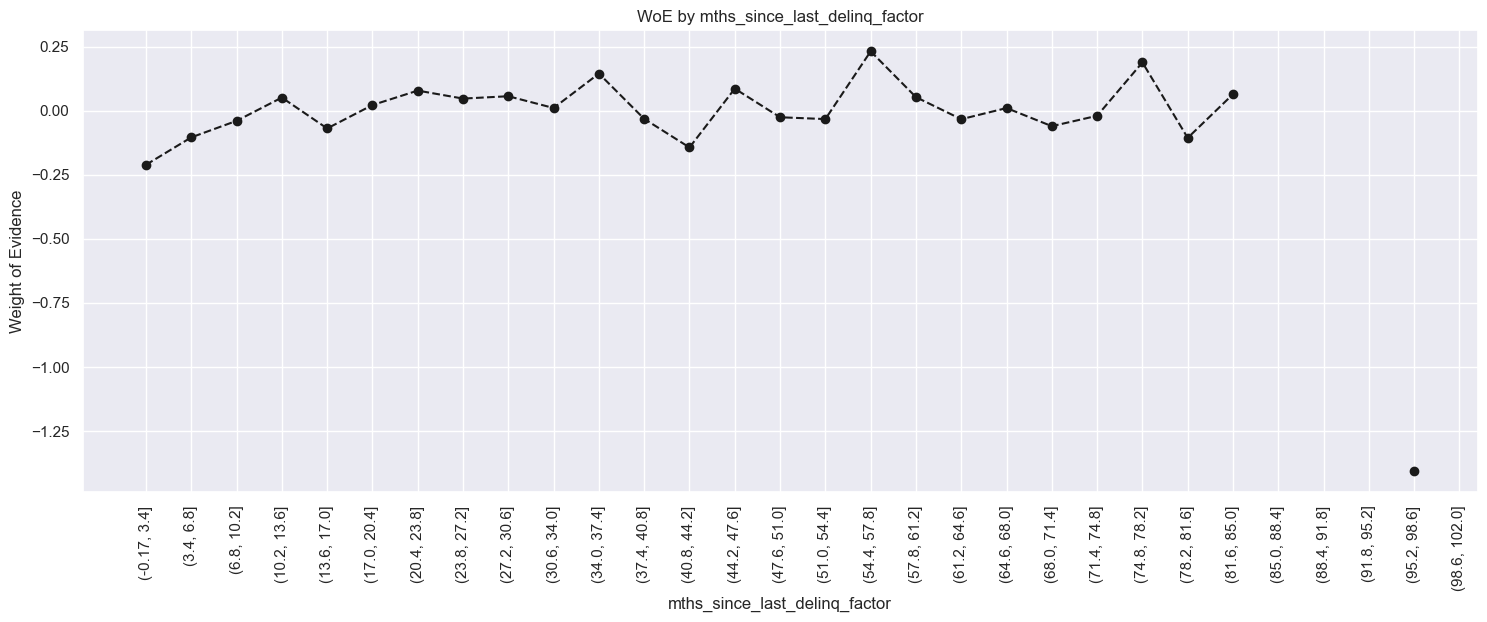

In [353]:
plot_by_woe(df_temp, 90)